# pre_investigation

## post_processing

In [33]:
import os
import re
rootdir = './'
filelist = os.listdir(rootdir)
logfile = [i for i in filelist if re.search('gridresult',i) != None]

In [39]:
logfile

['gridresult_1.log',
 'gridresult_10.log',
 'gridresult_3.log',
 'gridresult_30.log',
 'gridresult_48.log']

In [96]:
def processFile(filename):
    f = open(filename,'r')
    result = [None for i in range(900)]
    for l in f:
        spli = re.split('gridNum:|, nrmse:|i:96, step:27', l)
        result[int(spli[1])] = float(spli[2])
    return result

In [87]:
def printNoneindex(f):
    for i,v in enumerate(f):
        if v == None:
            print(i)

In [99]:
f1 = processFile(logfile[0])
f10 = processFile(logfile[1])
f3 = processFile(logfile[2])
f30 = processFile(logfile[3])
f48 = processFile(logfile[4])

In [106]:
import numpy as np
result = np.stack([f1,f10,f3,f30,f48])

In [112]:
from train_evaluate import *

/home/hyf/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [121]:
test = dataX[1]

In [125]:
def walk_forward_validation_debug(X, config, stepahead = 1):
    predictions = list()
    trainx, testx = X[:-testlen], X[-testlen:]
    history = [x for x in trainx]
    for i in range(0,len(testx),stepahead):
        for step in range(1,stepahead+1):
            #print('i:%d, step:%d'%(i,step))
            yhat = arima_forecast(history, config)
            predictions.append(yhat)
            history.append(yhat)
        history[-stepahead:] = testx[i:i+stepahead]
    nrmse_score = nrmse(testx, predictions)
    return nrmse_score,testx, predictions

In [126]:
result1 = walk_forward_validation_debug(test,cfg,1)

In [127]:
result3 = walk_forward_validation_debug(test,cfg,3)

In [128]:
result10 = walk_forward_validation_debug(test,cfg,10)

In [134]:
import matplotlib.pyplot as plt
import pandas as pd

In [146]:
t = pd.DataFrame(result1[1])

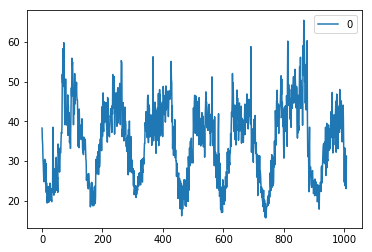

In [147]:
t.plot()

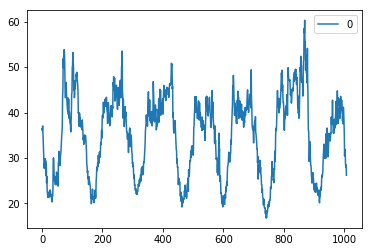

In [148]:
t1 = pd.DataFrame(result1[2])
t1.plot()

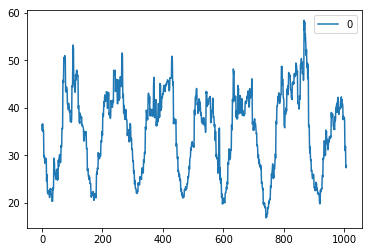

In [149]:
t3= pd.DataFrame(result3[2])
t3.plot()

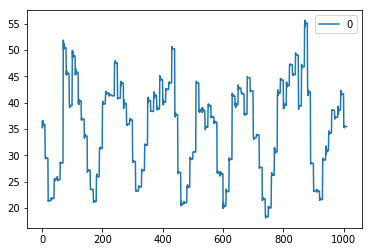

In [150]:
t10= pd.DataFrame(result10[2])
t10.plot()

In [186]:
all_t = pd.concat([t[:30],t1[:30],t3[:30],t10[:30]], keys = ['test', 'step1', 'step3', 'step10'], axis = 1)

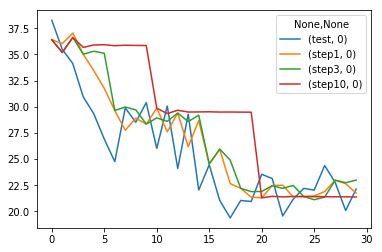

In [187]:
all_t.plot(legend=True)

In [188]:
result1[0]

0.36639118668911064

In [189]:
result3[0]

0.36404538603216774

In [190]:
result10[0]

0.3639036099211289

In [220]:
def nrmse(testx, predictions):
    #notice that testx is array while predictions is list of array
    #we should first convert list of array into array
    if type(predictions) == list:
        predictions = np.asarray(predictions).squeeze()
    assert predictions.shape == testx.shape
    meant = np.mean(testx)
    mse = np.mean(np.power(testx-predictions,2))
    rmse = np.sqrt(mse)
    nrmse = rmse/meant
    return nrmse

In [225]:
for i in range(0,len(t)+1,100):
    print("===============================")
    print(i)
    print(nrmse(result1[1][:i],result1[2][:i]))
    print(nrmse(result3[1][:i],result3[2][:i]))
    print(nrmse(result10[1][:i],result10[2][:i]))

0
nan
nan
nan
100
0.1440517567858325
0.16408463021925584
0.2189731499070659
200
0.12518490428179202
0.1451368383656354
0.1805078891513995
300
0.12133016432868511
0.13656153080699918
0.16073888824610125
400
0.12125825473779736
0.13487612750706648
0.15640867939128233
500
0.11939922355330339
0.1321056749806013
0.1640031373918782
600
0.12207975090261189
0.13418272319262103
0.1677662635922659
700
0.1211441548730987
0.1336058804045844
0.16584363254718662
800
0.12125978004685764
0.13316310653157645
0.1668451370621329
900
0.12424854291499063
0.1357176523378626
0.1717876187513098
1000
0.12412526363951461
0.13427981009026918
0.1687896431250117


In [200]:
np.mean(result1[1])

35.13834147681801

In [210]:
np.shape(result1[1])

(1008,)

In [211]:
np.asarray(result1[2]).squeeze()

array([36.40695698, 36.03405544, 37.04583643, ..., 28.03274542,
       28.46891428, 26.20665126])

In [216]:
type(result1[1])

numpy.ndarray

In [217]:
type(result1[2])

list

In [212]:
np.mean(np.power(result1[1]-np.asarray(result1[2]).squeeze(),2))

19.180690203829176

In [203]:
result1[1]-result1[2]

array([[  1.86277078,  -0.92140919,  -2.27822202, ...,  -5.96800279,
        -13.40320546,  -5.17699946],
       [  2.23567233,  -0.54850765,  -1.90532047, ...,  -5.59510124,
        -13.03030391,  -4.80409792],
       [  1.22389134,  -1.56028864,  -2.91710146, ...,  -6.60688223,
        -14.0420849 ,  -5.81587891],
       ...,
       [ 10.23698235,   7.45280237,   6.09598955, ...,   2.40620878,
         -5.02899389,   3.1972121 ],
       [  9.80081349,   7.01663352,   5.65982069, ...,   1.97003992,
         -5.46516275,   2.76104324],
       [ 12.06307651,   9.27889653,   7.92208371, ...,   4.23230294,
         -3.20289973,   5.02330626]])

In [204]:
t - t1

,0
0,1.862771
1,-0.548508
2,-2.917101
3,-4.092115
4,-4.116996
5,-4.847349
6,-4.892181
7,2.138992
8,-0.388554
9,2.054788


In [202]:
np.mean(np.power(t-t1,2))

0    19.18069
dtype: float64

In [ ]:

    mse = np.mean(np.power(testx-predictions,2))
    rmse = np.sqrt(mse)
    nrmse = rmse/meant
    return nrmse

In [198]:
result1[2]

[array([36.40695698]),
 array([36.03405544]),
 array([37.04583643]),
 array([35.02319392]),
 array([33.44828965]),
 array([31.75610261]),
 array([29.64355434]),
 array([27.74625033]),
 array([28.90573142]),
 array([28.34018394]),
 array([29.86363901]),
 array([27.59794233]),
 array([29.39382771]),
 array([26.17566691]),
 array([28.68400836]),
 array([24.52517545]),
 array([25.92117809]),
 array([22.64747964]),
 array([22.19807952]),
 array([21.35668616]),
 array([21.28819853]),
 array([22.45760874]),
 array([22.49981149]),
 array([21.38230113]),
 array([21.42019895]),
 array([21.46446335]),
 array([21.88982985]),
 array([22.97852208]),
 array([22.63837007]),
 array([21.74250048]),
 array([21.91268439]),
 array([21.13702123]),
 array([21.15085882]),
 array([20.31810917]),
 array([21.69211733]),
 array([21.57483464]),
 array([23.19431876]),
 array([29.684401]),
 array([30.03216181]),
 array([29.42155564]),
 array([25.16973434]),
 array([24.95766935]),
 array([25.96081089]),
 array([24.94

In [196]:
for i in range(0,len(t)+1,100):
    print("===============================")
    print(i)
    print(nrmse(t[:i],t1[:i]))
    print(nrmse(t[:i],t3[:i]))
    print(nrmse(t[:i],t10[:i]))

0
0   NaN
dtype: float64
0   NaN
dtype: float64
0   NaN
dtype: float64
100
0    0.144052
dtype: float64
0    0.164085
dtype: float64
0    0.218973
dtype: float64
200
0    0.125185
dtype: float64
0    0.145137
dtype: float64
0    0.180508
dtype: float64
300
0    0.12133
dtype: float64
0    0.136562
dtype: float64
0    0.160739
dtype: float64
400
0    0.121258
dtype: float64
0    0.134876
dtype: float64
0    0.156409
dtype: float64
500
0    0.119399
dtype: float64
0    0.132106
dtype: float64
0    0.164003
dtype: float64
600
0    0.12208
dtype: float64
0    0.134183
dtype: float64
0    0.167766
dtype: float64
700
0    0.121144
dtype: float64
0    0.133606
dtype: float64
0    0.165844
dtype: float64
800
0    0.12126
dtype: float64
0    0.133163
dtype: float64
0    0.166845
dtype: float64
900
0    0.124249
dtype: float64
0    0.135718
dtype: float64
0    0.171788
dtype: float64
1000
0    0.124125
dtype: float64
0    0.13428
dtype: float64
0    0.16879
dtype: float64


In [191]:
nrmse(t[:30],t1[:30])

0    0.117066
dtype: float64

In [193]:
nrmse(t[:30],t3[:30])

0    0.130839
dtype: float64

In [192]:
nrmse(t[:30],t10[:30])

0    0.210476
dtype: float64